In [1]:
import numpy as np
import pandas as pd
import pandasql
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import feature_selection
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import f1_score
import sklearn.learning_curve as curves
import matplotlib.pyplot as plt
from time import time
from sklearn import tree
import datetime 

%matplotlib inline

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
df = pd.read_csv('employee_retention_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [3]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
df.describe(include=[np.object])

,dept,join_date,quit_date
count,24702,24702,13510
unique,6,995,664
top,customer_service,2012-01-03,2015-05-08
freq,9180,105,111


In [6]:
print df.groupby('dept')['salary'].mean().sort_values()
print df.groupby('seniority').count()

dept
customer_service     82245.424837
marketing           135598.042311
sales               135912.358134
design              137460.869565
engineer            205544.548016
data_science        206885.893417
Name: salary, dtype: float64
           employee_id  company_id  dept  salary  join_date  quit_date
seniority                                                             
1                  861         861   861     861        861        430
2                  942         942   942     942        942        500
3                  881         881   881     881        881        447
4                  895         895   895     895        895        422
5                  936         936   936     936        936        533
6                  950         950   950     950        950        571
7                  928         928   928     928        928        511
8                 1008        1008  1008    1008       1008        586
9                  944         944   944     944    

In [7]:
df = df[df['seniority'] <= 30]
df.groupby('seniority').count()

,employee_id,company_id,dept,salary,join_date,quit_date
seniority,,,,,,
1,861,861,861,861,861,430
2,942,942,942,942,942,500
3,881,881,881,881,881,447
4,895,895,895,895,895,422
5,936,936,936,936,936,533
6,950,950,950,950,950,571
7,928,928,928,928,928,511
8,1008,1008,1008,1008,1008,586
9,944,944,944,944,944,522


In [8]:
companies = pd.unique(df['company_id'])
company_id = pd.DataFrame(companies, columns = ['company'])
company_id['key'] = 0

date = datetime.date(2011, 1, 24)
end_date = datetime.date(2015, 12, 13)
day_step = datetime.timedelta(days = 1)
days = []

while date <= end_date:
    days.append(date)
    date += day_step

print 'total days from 2011-01-24 to 2015-12-13:\t', len(days)

date = pd.DataFrame(days)
date['key'] = 0   

df_hc_columns = ['date','employee_headcount','company_id']
df_hc = pd.merge(date, company_id, on = 'key')
df_hc.columns = df_hc_columns
df_hc


total days from 2011-01-24 to 2015-12-13:	1785


,date,employee_headcount,company_id
0,2011-01-24,0,7
1,2011-01-24,0,4
2,2011-01-24,0,2
3,2011-01-24,0,9
4,2011-01-24,0,1
5,2011-01-24,0,6
6,2011-01-24,0,10
7,2011-01-24,0,5
8,2011-01-24,0,3
9,2011-01-24,0,8


In [9]:
df_join = df.groupby(['join_date', 'company_id']).size().to_frame(name = 'join_count').reset_index()
df_join

,join_date,company_id,join_count
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-25,1,2


In [10]:
df_quit = df.groupby(['quit_date', 'company_id']).size().to_frame(name = 'quit_count').reset_index()
df_quit

,quit_date,company_id,quit_count
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-21,1,1
3,2011-10-28,4,1
4,2011-11-11,1,1
5,2011-11-22,1,1
6,2011-11-25,1,1
7,2011-11-25,2,1
8,2011-12-02,6,1
9,2011-12-02,8,1


In [11]:
for i in range(len(df_join['join_date'])):
    df_join.loc[i, 'join_date_t'] = datetime.datetime.strptime(df_join['join_date'][i], '%Y-%m-%d').date()
    
for i in range(len(df_quit['quit_date'])):
    df_quit.loc[i, 'quit_date_t'] = datetime.datetime.strptime(df_quit['quit_date'][i], '%Y-%m-%d').date()

    
    
result= pd.merge(df_hc, df_join, left_on = ['date', 'company_id'], right_on = ['join_date_t', 'company_id'], how = 'outer')
result = pd.merge(result, df_quit, left_on = ['date', 'company_id'], right_on = ['quit_date_t', 'company_id'], how = 'outer')


In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 9 columns):
date                  21420 non-null object
employee_headcount    21420 non-null int64
company_id            21420 non-null int64
join_date             5129 non-null object
join_count            5129 non-null float64
join_date_t           5129 non-null object
quit_date             2724 non-null object
quit_count            2724 non-null float64
quit_date_t           2724 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [13]:
df_hc['date'][0] == df_join['join_date_t'][0]

True

In [14]:
df_hc['date'][0]

datetime.date(2011, 1, 24)

In [15]:
df_join['join_date_t'][0]

datetime.date(2011, 1, 24)

In [16]:
result 

,date,employee_headcount,company_id,join_date,join_count,join_date_t,quit_date,quit_count,quit_date_t
0,2011-01-24,0,7,2011-01-24,1.0,2011-01-24,NaN,NaN,NaN
1,2011-01-24,0,4,2011-01-24,12.0,2011-01-24,NaN,NaN,NaN
2,2011-01-24,0,2,2011-01-24,17.0,2011-01-24,NaN,NaN,NaN
3,2011-01-24,0,9,2011-01-24,3.0,2011-01-24,NaN,NaN,NaN
4,2011-01-24,0,1,2011-01-24,25.0,2011-01-24,NaN,NaN,NaN
5,2011-01-24,0,6,2011-01-24,3.0,2011-01-24,NaN,NaN,NaN
6,2011-01-24,0,10,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-01-24,0,5,2011-01-24,5.0,2011-01-24,NaN,NaN,NaN
8,2011-01-24,0,3,2011-01-24,9.0,2011-01-24,NaN,NaN,NaN
9,2011-01-24,0,8,2011-01-24,6.0,2011-01-24,NaN,NaN,NaN


In [17]:
if result['join_count'].sum() == 24700 and result['quit_count'].sum() == 13508:
    print 'result dataframe is correct!'
else:
    print 'please re-check your code for creating result dataframe!'

result dataframe is correct!


In [18]:
# drop 'join_date' and 'quit_date' columns
result = result.drop('join_date',1)
result = result.drop('quit_date',1)
result = result.drop('join_date_t',1)
result = result.drop('quit_date_t',1)
# fill NaN values with 0
result = result.fillna(0)
# group by 'date' and 'company_id' to finish the dataframe
result = result.sort_values(['date','company_id'])
result

,date,employee_headcount,company_id,join_count,quit_count
4,2011-01-24,0,1,25.0,0.0
2,2011-01-24,0,2,17.0,0.0
8,2011-01-24,0,3,9.0,0.0
1,2011-01-24,0,4,12.0,0.0
7,2011-01-24,0,5,5.0,0.0
5,2011-01-24,0,6,3.0,0.0
0,2011-01-24,0,7,1.0,0.0
9,2011-01-24,0,8,6.0,0.0
3,2011-01-24,0,9,3.0,0.0
6,2011-01-24,0,10,0.0,0.0


In [19]:
result['join_cum_sum'] = result.groupby('company_id')['join_count'].transform(pd.Series.cumsum).to_frame()
result['quit_cum_sum'] = result.groupby('company_id')['quit_count'].transform(pd.Series.cumsum).to_frame()
result


,date,employee_headcount,company_id,join_count,quit_count,join_cum_sum,quit_cum_sum
4,2011-01-24,0,1,25.0,0.0,25.0,0.0
2,2011-01-24,0,2,17.0,0.0,17.0,0.0
8,2011-01-24,0,3,9.0,0.0,9.0,0.0
1,2011-01-24,0,4,12.0,0.0,12.0,0.0
7,2011-01-24,0,5,5.0,0.0,5.0,0.0
5,2011-01-24,0,6,3.0,0.0,3.0,0.0
0,2011-01-24,0,7,1.0,0.0,1.0,0.0
9,2011-01-24,0,8,6.0,0.0,6.0,0.0
3,2011-01-24,0,9,3.0,0.0,3.0,0.0
6,2011-01-24,0,10,0.0,0.0,0.0,0.0


In [20]:
result['employee_headcount'] = result['join_cum_sum'] - result['quit_cum_sum']
headcount_final = result[['date','company_id','employee_headcount']]
headcount_final

,date,company_id,employee_headcount
4,2011-01-24,1,25.0
2,2011-01-24,2,17.0
8,2011-01-24,3,9.0
1,2011-01-24,4,12.0
7,2011-01-24,5,5.0
5,2011-01-24,6,3.0
0,2011-01-24,7,1.0
9,2011-01-24,8,6.0
3,2011-01-24,9,3.0
6,2011-01-24,10,0.0


### Smart way to create table for day, employee_headcount, and company_id

In [21]:
data = pd.read_csv('employee_retention_data.csv', parse_dates=['join_date', 'quit_date'])
data = data[data['seniority'] <= 30]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 7 columns):
employee_id    24700 non-null float64
company_id     24700 non-null int64
dept           24700 non-null object
seniority      24700 non-null int64
salary         24700 non-null float64
join_date      24700 non-null datetime64[ns]
quit_date      13508 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.5+ MB


In [22]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq = 'D')
unique_company = sorted(data['company_id'].unique())

day = []
company = []
headcount = []

for date in unique_date:
    for idx in unique_company:
        total_join = len(data[(data['join_date'] <= date) & (data['company_id'] == idx)])
        total_quit = len(data[(data['quit_date'] <= date) & (data['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)

headcount_s = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount}, columns = ['day', 'company_id', 'employee_headcount'])

In [23]:
headcount_s

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-24,10,0


### Employee Churn Analysis

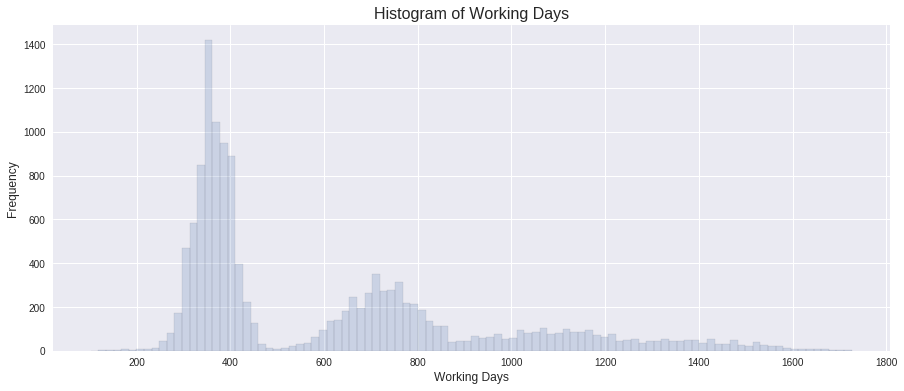

In [24]:
quit_data = data[~data['quit_date'].isnull()]
stay_data = data[data['quit_date'].isnull()]
work_days = np.array(list(map(lambda x: x.days, quit_data['quit_date'] - quit_data['join_date'])))

hist_kws = {'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize = (15, 6))
sns.distplot(work_days, bins = 100, kde = False, ax = ax, hist_kws = hist_kws)
ax.set_title('Histogram of Working Days', fontsize = 16)
ax.set_xlabel('Working Days', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.show()

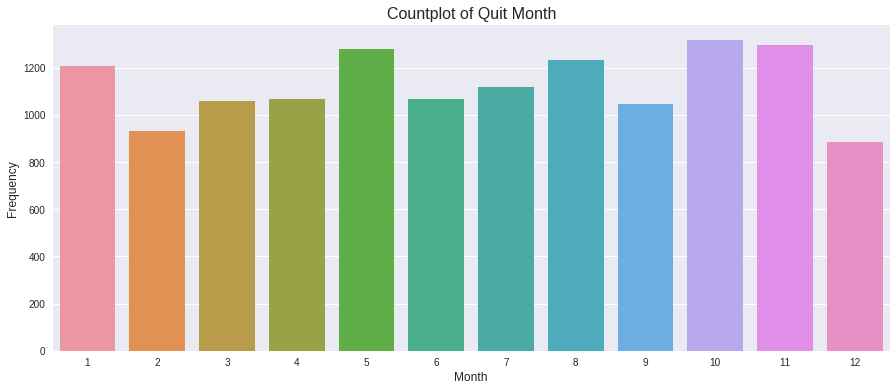

In [25]:
quit_week = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))

fig, ax = plt.subplots(figsize = (15, 6))
sns.countplot(quit_week, ax = ax)
ax.set_title('Countplot of Quit Month', fontsize = 16)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.show()

### Decision Tree Model

In [26]:
# Binary label for early quit (less than 13 months)
stop_date = pd.to_datetime('2015-12-13') - pd.DateOffset(days=365 + 31)
subset = data[data['join_date'] < stop_date]
quit = subset['quit_date'].isnull() | (subset['quit_date'] > subset['join_date'] + pd.DateOffset(days=396))
subset['quit'] = 1 - quit.astype(int)
subset.head()

/home/amywu/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [27]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 24699
Data columns (total 8 columns):
employee_id    19268 non-null float64
company_id     19268 non-null int64
dept           19268 non-null object
seniority      19268 non-null int64
salary         19268 non-null float64
join_date      19268 non-null datetime64[ns]
quit_date      13329 non-null datetime64[ns]
quit           19268 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [28]:
def preprocess_features(X):
    ''' 
    X: pandas data frame
    Preprocesses the raw data and converts non-numeric binary variables into
    binary (0/1) variables. Converts categorical variables into dummy variables. 
    '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [29]:
subset = preprocess_features(subset)

In [30]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 24699
Data columns (total 13 columns):
employee_id              19268 non-null float64
company_id               19268 non-null int64
dept_customer_service    19268 non-null uint8
dept_data_science        19268 non-null uint8
dept_design              19268 non-null uint8
dept_engineer            19268 non-null uint8
dept_marketing           19268 non-null uint8
dept_sales               19268 non-null uint8
seniority                19268 non-null int64
salary                   19268 non-null float64
join_date                19268 non-null datetime64[ns]
quit_date                13329 non-null datetime64[ns]
quit                     19268 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), uint8(6)
memory usage: 1.9 MB


In [31]:
company = pd.get_dummies(subset['company_id'], prefix='company')
subset = subset.join(company)

In [32]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 24699
Data columns (total 25 columns):
employee_id              19268 non-null float64
company_id               19268 non-null int64
dept_customer_service    19268 non-null uint8
dept_data_science        19268 non-null uint8
dept_design              19268 non-null uint8
dept_engineer            19268 non-null uint8
dept_marketing           19268 non-null uint8
dept_sales               19268 non-null uint8
seniority                19268 non-null int64
salary                   19268 non-null float64
join_date                19268 non-null datetime64[ns]
quit_date                13329 non-null datetime64[ns]
quit                     19268 non-null int64
company_1                19268 non-null uint8
company_2                19268 non-null uint8
company_3                19268 non-null uint8
company_4                19268 non-null uint8
company_5                19268 non-null uint8
company_6                19268 non-null u

In [33]:
label = subset['quit'].values
features = subset.drop(['quit', 'join_date', 'quit_date', 'employee_id', 'company_id'], axis = 1)
print "features are:\t", features.columns

features are:	Index([u'dept_customer_service', u'dept_data_science', u'dept_design',
       u'dept_engineer', u'dept_marketing', u'dept_sales', u'seniority',
       u'salary', u'company_1', u'company_2', u'company_3', u'company_4',
       u'company_5', u'company_6', u'company_7', u'company_8', u'company_9',
       u'company_10', u'company_11', u'company_12'],
      dtype='object')


In [34]:
features['seniority'] = features['seniority'].astype('float')

In [35]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19268 entries, 0 to 24699
Data columns (total 20 columns):
dept_customer_service    19268 non-null uint8
dept_data_science        19268 non-null uint8
dept_design              19268 non-null uint8
dept_engineer            19268 non-null uint8
dept_marketing           19268 non-null uint8
dept_sales               19268 non-null uint8
seniority                19268 non-null float64
salary                   19268 non-null float64
company_1                19268 non-null uint8
company_2                19268 non-null uint8
company_3                19268 non-null uint8
company_4                19268 non-null uint8
company_5                19268 non-null uint8
company_6                19268 non-null uint8
company_7                19268 non-null uint8
company_8                19268 non-null uint8
company_9                19268 non-null uint8
company_10               19268 non-null uint8
company_11               19268 non-null uint8
company_12   

In [36]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = f1_score(y_true, y_predict)
    return score

In [37]:
def feature_importance(clf):
    """
    clf: classifier object
    """
    importances = clf.feature_importances_
    sort_ind = np.argsort(importances)
    pad = np.arange(len(X_train.columns.values)) + 0.5
    plt.figure(figsize=(14,16))
    plt.barh(pad,importances[sort_ind],align='center')
    plt.xlabel("Relative Importance")
    plt.yticks(pad,X_train.columns.values[sort_ind])
    plt.title("Variable Importance")
    plt.show()
    

In [38]:
def fit_model(X, y, regressor, params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    #regressor = DecisionTreeRegressor(random_state=5)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 15414 samples.
Testing set has 3854 samples.


In [40]:
params = {'max_depth': range(1,11) , 'n_estimators': [40, 100]}
regressor = RandomForestClassifier(random_state = 5)

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train, regressor, params)

# Produce the value for 'max_depth'
print "Parameters {} for the optimal model.".format(reg.get_params())


/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Parameters {'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 5, 'min_impurity_split': 1e-07, 'max_features': 'auto', 'max_depth': 10, 'class_weight': None} for the optimal model.


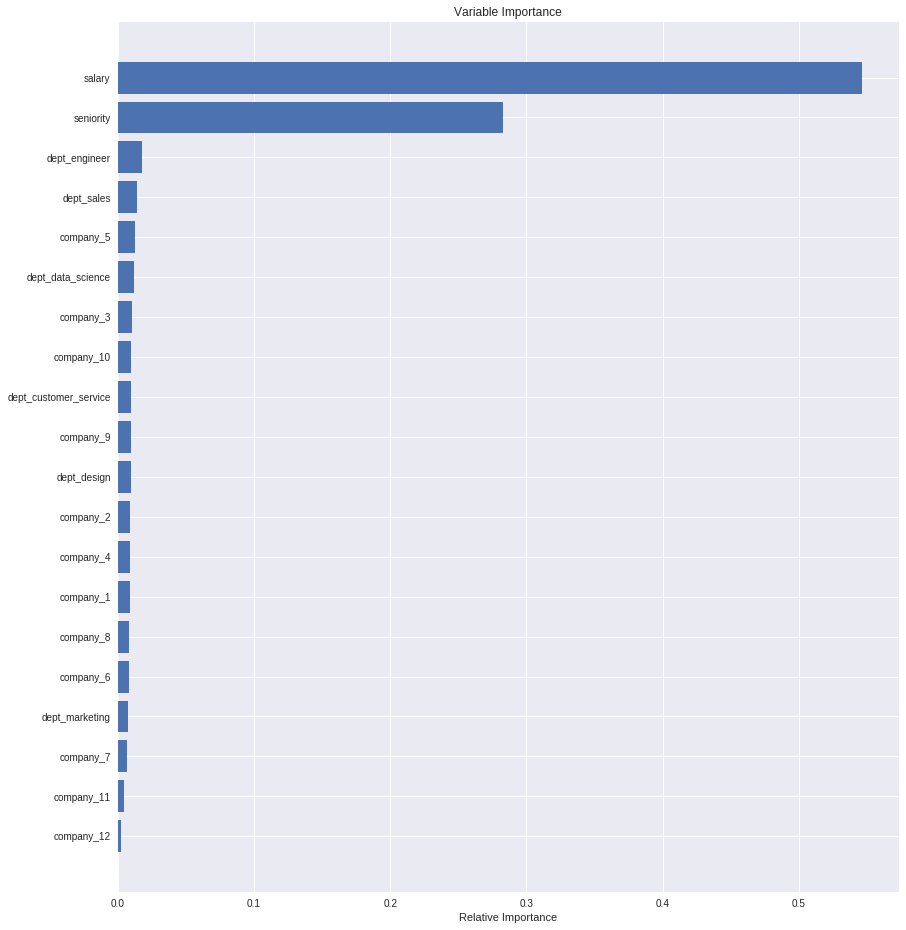

In [41]:
feature_importance(reg)

In [42]:
pred = reg.predict(X_test)
score = performance_metric(y_test, pred)
print("f1 score: " + str(score))

f1 score: 0.00865051903114


In [43]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X = X_train, y = y_train)

In [44]:
# # displays graphviz visualization of the decision tree on the notebook
# def visualize_tree(dtree, feature_names):
#     tree.export_graphviz(dtree, out_file='dt_tree.dot')
#     with open('dt_tree.dot') as f:
#         dot_graph = f.read()
#         print dot_graph
#     graphviz.Source(dot_graph)

In [45]:
features = list(X_train.columns)
targets = ['Not quit', 'Quit']
dot_data = tree.export_graphviz(clf, out_file ='dt_tree.dot', feature_names = features, class_names = targets, rounded=True )  


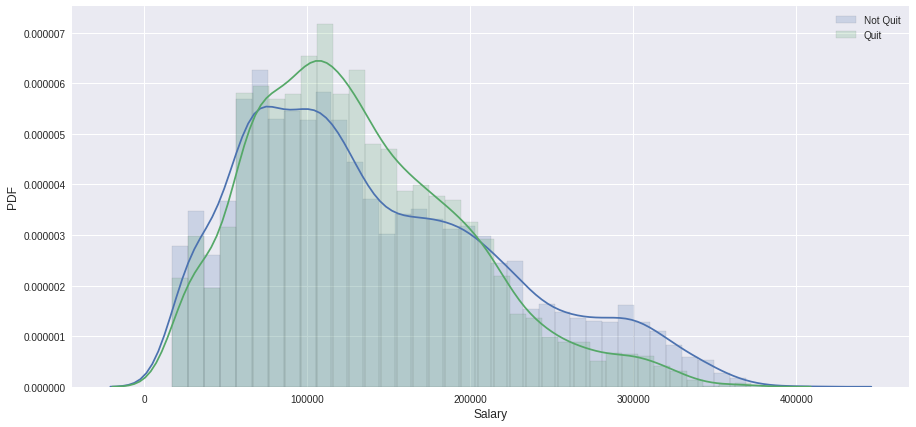

In [46]:
# Visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(subset[subset['quit'] == 0]['salary'], 
             label='Not Quit', ax=ax, hist_kws=hist_kws)
sns.distplot(subset[subset['quit'] == 1]['salary'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('Salary', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()